In [1]:
import numpy as np

class Perceptron:
    def __init__(self, ip_size): #Initializer method
        self.weights = np.zeros(ip_size) #Assigns all the initial weights as zeroes
        self.bias = 0 #Assigns the initial bias as zero
    
    def predict(self, ip):
        activation = np.dot(self.weights, ip) + self.bias #activation_function = (weight*input) + bias
        return 1 if activation >= 0 else 0
    
    def train(self, train_ip, labels, learning_rate=0.2, epochs=100):
        for epoch in range(epochs): #Epoch refers to a single pass through the entire training dataset. During one epoch, the model iterates over all the training examples once, updating its parameters (weights and biases) based on the errors it makes in predicting the outputs.
            total_error = 0
            for inputs, label in zip(train_ip, labels):
                prediction = self.predict(inputs)
                error = label - prediction #Error is calculated for each input-output pair
                total_error += abs(error) #Total error is stored for the whole dataset
                self.weights += learning_rate * error * inputs
                self.bias += learning_rate * error
            if total_error == 0: #convergence refers to the point at which the model has learned to classify the training examples correctly or has reached a state where further training does not significantly improve its performance.
                print("Training converged at epoch:", epoch+1)
                break
            print("Epoch:", epoch+1, " Total Errors:", total_error)
        else:
            print("Training did not converge within the specified epochs.")

In [2]:
# AND function
and_ip = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) #The inputs can be visualized using a truth table
and_labels = np.array([0, 0, 0, 1]) # labels refer to the known correct outputs corresponding to the input data during the training phase.
print("AND Function:")
and_perceptron = Perceptron(2) #We have passed 2 as an argument for the ip_size because we are dealing with two inputs here
print("Initial weights:", and_perceptron.weights) #initial weights should be printed as 0.0
and_perceptron.train(and_ip, and_labels)
print("Final weights:", and_perceptron.weights)
print()

AND Function:
Initial weights: [0. 0.]
Epoch: 1  Total Errors: 2
Epoch: 2  Total Errors: 3
Epoch: 3  Total Errors: 3
Training converged at epoch: 4
Final weights: [0.4 0.2]



In [3]:
# OR function
or_ip = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
or_labels = np.array([0, 1, 1, 1])

print("OR Function:")
or_perceptron = Perceptron(2) #We have passed 2 as an argument for the ip_size because we are dealing with two inputs here
print("Initial weights:", or_perceptron.weights) #initial weights should be printed as 0.0
or_perceptron.train(or_ip, or_labels)
print("Final weights:", or_perceptron.weights)
print()


OR Function:
Initial weights: [0. 0.]
Epoch: 1  Total Errors: 2
Epoch: 2  Total Errors: 2
Epoch: 3  Total Errors: 1
Training converged at epoch: 4
Final weights: [0.2 0.2]



In [4]:
# NAND function
nand_ip = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
nand_labels = np.array([1, 1, 1, 0])

print("NAND Function:")
nand_perceptron = Perceptron(2)
print("Initial weights:", nand_perceptron.weights)
nand_perceptron.train(nand_ip, nand_labels)
print("Final weights:", nand_perceptron.weights)
print()

NAND Function:
Initial weights: [0. 0.]
Epoch: 1  Total Errors: 1
Epoch: 2  Total Errors: 3
Epoch: 3  Total Errors: 3
Epoch: 4  Total Errors: 2
Epoch: 5  Total Errors: 1
Training converged at epoch: 6
Final weights: [-0.4 -0.2]



In [5]:
# XOR function
xor_ip = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_labels = np.array([0, 1, 1, 0])

print("XOR Function:")
xor_perceptron = Perceptron(2)
print("Initial weights:", xor_perceptron.weights)
xor_perceptron.train(xor_ip, xor_labels)
print("Final weights:", xor_perceptron.weights)

XOR Function:
Initial weights: [0. 0.]
Epoch: 1  Total Errors: 3
Epoch: 2  Total Errors: 3
Epoch: 3  Total Errors: 4
Epoch: 4  Total Errors: 4
Epoch: 5  Total Errors: 4
Epoch: 6  Total Errors: 4
Epoch: 7  Total Errors: 4
Epoch: 8  Total Errors: 4
Epoch: 9  Total Errors: 4
Epoch: 10  Total Errors: 4
Epoch: 11  Total Errors: 4
Epoch: 12  Total Errors: 4
Epoch: 13  Total Errors: 4
Epoch: 14  Total Errors: 4
Epoch: 15  Total Errors: 4
Epoch: 16  Total Errors: 4
Epoch: 17  Total Errors: 4
Epoch: 18  Total Errors: 4
Epoch: 19  Total Errors: 4
Epoch: 20  Total Errors: 4
Epoch: 21  Total Errors: 4
Epoch: 22  Total Errors: 4
Epoch: 23  Total Errors: 4
Epoch: 24  Total Errors: 4
Epoch: 25  Total Errors: 4
Epoch: 26  Total Errors: 4
Epoch: 27  Total Errors: 4
Epoch: 28  Total Errors: 4
Epoch: 29  Total Errors: 4
Epoch: 30  Total Errors: 4
Epoch: 31  Total Errors: 4
Epoch: 32  Total Errors: 4
Epoch: 33  Total Errors: 4
Epoch: 34  Total Errors: 4
Epoch: 35  Total Errors: 4
Epoch: 36  Total Errors: 

The reason XOR function did not converge withing 100 epochs because XOR is a not linearly separable and Perceptrons can only deal with linear inputs. Linear separability means that it's possible to draw a straight line (or hyperplane in higher dimensions) to separate the classes. We can even change the number of epochs but it will still not converge. For implementing XOR, we have to use a Multi-Layer Perceptron.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Defining the XOR input and output data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Defining the architecture of the neural network (Multi-layer perceptron)
model = Sequential([
    Dense(2, input_dim=2, activation='relu'),  # Hidden layer with 2 neurons and R activation
    Dense(1, activation='sigmoid')             # Output layer with 1 neuron and Sigmoid activation
])

# Compiling the model
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
# Binary cross-entropy is a common loss function used to measure the difference between the true labels and the predicted probabilities. It is also known as losg loss.
#L(y, y') = -[y * log(y') + (1 - y) * log(1 - y')]; y is the true label, y' is the predicted label

# Training the model
model.fit(X, y, epochs=1000, verbose=0)
#Setting verbose to 0 means silent mode, where no output will be displayed during the training process.

# Evaluating the model
loss, accuracy = model.evaluate(X, y)
print(f"Loss: {loss}, Accuracy: {accuracy}")

# Prediction using the trained model
predictions = model.predict(X)
print("Predictions:")
print(predictions)

2024-02-17 18:29:15.573989: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-17 18:29:17.828483: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


1/1 [==============================] - 0s 354ms/step - loss: 0.6931 - accuracy: 0.5000
Loss: 0.6931471824645996, Accuracy: 0.5
1/1 [==============================] - 0s 73ms/step
Predictions:
[[0.5]
 [0.5]
 [0.5]
 [0.5]]


We can also create a Multi-Layer Perceptron without using tensorflow.

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XOR function
inputs_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target_xor = np.array([[0], [1], [1], [0]])

# Defining architecture of the MLP (input layer, hidden layer, output layer)
input_layer_neurons = inputs_xor.shape[1]
hidden_layer_neurons = 3
output_layer_neurons = 1

# Initialize weights and biases
hidden_weights = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
hidden_biases = np.zeros((1, hidden_layer_neurons))

output_weights = np.random.uniform(size=(hidden_layer_neurons, output_layer_neurons))
output_biases = np.zeros((1, output_layer_neurons))

# Training the neural network using backpropagation
epochs = 1000
learning_rate = 0.2

for epoch in range(epochs):
    # Forward pass
    hidden_activation = sigmoid(np.dot(inputs_xor, hidden_weights) + hidden_biases)
    output_activation = sigmoid(np.dot(hidden_activation, output_weights) + output_biases)

    # Computing errors
    output_error = target_xor - output_activation
    hidden_error = output_error.dot(output_weights.T)

    # Backpropagation
    output_delta = output_error * sigmoid_derivative(output_activation)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_activation)

    # Updating weights and biases
    output_weights += hidden_activation.T.dot(output_delta) * learning_rate
    output_biases += np.sum(output_delta, axis=0, keepdims=True) * learning_rate

    hidden_weights += inputs_xor.T.dot(hidden_delta) * learning_rate
    hidden_biases += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

# Print final output after training
print("XOR function:")
print("Final Output after Training:")
print(output_activation)

XOR function:
Final Output after Training:
[[0.49598493]
 [0.47349846]
 [0.54504083]
 [0.48950014]]


Question 2

Minimum value of x: 0.9999996786123911
Number of iterations: 67


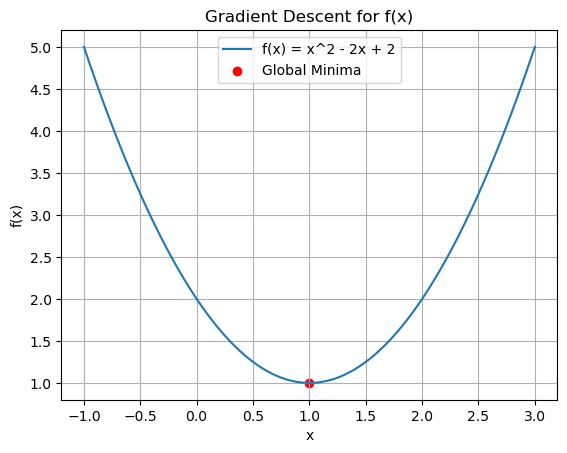

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Function definition
def f(x):
    return x**2 - 2*x + 2

# Define the variable and function
x = sp.Symbol('x')
f_expr = x**2 - 2*x + 2

# Differentiate the function with respect to x
f_prime = sp.diff(f_expr, x)

# Convert the symbolic expression to a lambda function
f_prime_func = sp.lambdify(x, f_prime, 'numpy')

# Gradient descent algorithm
def gradient_descent(learning_rate, initial_x, threshold):
    x = initial_x
    iterations = 0
    while True:
        gradient = f_prime_func(x)  # Calculate the gradient using the derivative
        x -= learning_rate * gradient  # Update x using the gradient descent update rule
        iterations += 1
        if abs(gradient) < threshold:
            break
    return x, iterations

# Parameters
learning_rate = 0.1
initial_x = 0
threshold = 1e-6

# Perform gradient descent
min_x, iterations = gradient_descent(learning_rate, initial_x, threshold)

# Print results
print("Minimum value of x:", min_x)
print("Number of iterations:", iterations)

# Visualize function and minima
x_values = np.linspace(-1, 3, 100)
plt.plot(x_values, f(x_values), label='f(x) = x^2 - 2x + 2')
plt.scatter(min_x, f(min_x), color='red', label='Global Minima')
plt.title('Gradient Descent for f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


Minimum value of x: 0.9999988827863623
Minimum value of y: 0.9999977611033297
Number of iterations: 32433


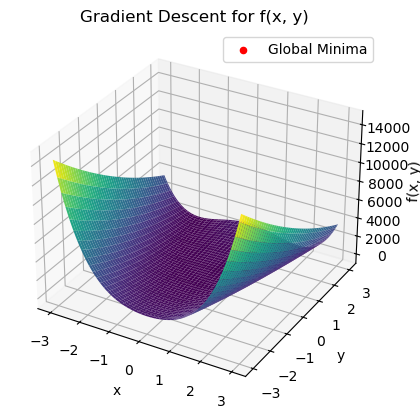

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Function definition
def f(x, y):
    return (1 - x)**2 + 100*(y - x**2)**2

# Define the variables and function
x, y = sp.symbols('x y')
f_expr = (1 - x)**2 + 100*(y - x**2)**2

# Differentiate the function with respect to x and y
f_prime_x = sp.diff(f_expr, x)
f_prime_y = sp.diff(f_expr, y)

# Convert the symbolic expressions to lambda functions
f_prime_x_func = sp.lambdify((x, y), f_prime_x, 'numpy')
f_prime_y_func = sp.lambdify((x, y), f_prime_y, 'numpy')

# Gradient descent algorithm
def gradient_descent(learning_rate, initial_x, initial_y, threshold):
    x, y = initial_x, initial_y
    iterations = 0
    while True:
        gradient_x = f_prime_x_func(x, y)
        gradient_y = f_prime_y_func(x, y)
        x -= learning_rate * gradient_x
        y -= learning_rate * gradient_y
        iterations += 1
        if np.sqrt(gradient_x**2 + gradient_y**2) < threshold:
            break
    return (x, y), iterations

# Parameters
learning_rate = 0.001
initial_x = -2
initial_y = 2
threshold = 1e-6

# Perform gradient descent
min_point, iterations = gradient_descent(learning_rate, initial_x, initial_y, threshold)
min_x, min_y = min_point

# Print results
print("Minimum value of x:", min_x)
print("Minimum value of y:", min_y)
print("Number of iterations:", iterations)

# Visualize function and minima
x_values = np.linspace(-3, 3, 100)
y_values = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_values, y_values)
Z = f(X, Y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.scatter(min_x, min_y, f(min_x, min_y), color='red', label='Global Minima')
ax.set_title('Gradient Descent for f(x, y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.legend()
plt.show()
